In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# Chemin vers le fichier CSV
chemin_fichier = "resultats_legifrance_loda.csv"
df_loda = pd.read_csv(chemin_fichier)

In [137]:
df_loda.sample()

,Titre,ID,Date,Nature,Etat,Origine,Date Publication
6660,Arrêté du 13 décembre 2010 portant création d'...,LEGITEXT000023407070_15-08-2018,2011-01-13T00:00:00.000+0000,ARRETE,VIGUEUR,LEGI,2011-01-12T00:00:00.000+0000


In [138]:
# On met la date sous format date de pandas
df_loda['Date'] = pd.to_datetime(df_loda['Date']) 

# On ajoute la colonne mois et l'année via la variable Date (On a arbitrairement écarté Date Publication car les écarts sont de quelques jours uniquement)
df_loda['Mois'] = df_loda['Date'].dt.month.apply(lambda x: f'{x:02}')
df_loda['Année'] = df_loda['Date'].dt.year.astype(str)

df_loda.head()

,Titre,ID,Date,Nature,Etat,Origine,Date Publication,Mois,Année
0,Arrêté du 31 août 2022 fixant les niveaux de p...,LEGITEXT000046244600_21-08-2023,2022-09-01 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-09-01T00:00:00.000+0000,09,2022
1,Arrêté du 30 août 2022 portant création de la ...,LEGITEXT000046664861_28-08-2023,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
2,Arrêté du 30 août 2022 portant création de la ...,LEGITEXT000046664861_02-12-2022,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
3,Arrêté du 29 août 2022 portant création de la ...,LEGITEXT000046666903_02-12-2022,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
4,Arrêté du 22 août 2022 fixant la liste des pos...,LEGITEXT000046230032_21-11-2022,2022-09-01 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-08-31T00:00:00.000+0000,09,2022


In [139]:
def nb_nature_txt(df,nature='LOI'):
    '''
    Renvoie le nombre d'occurence qu'un type de texte apparait
    '''
    df_bis = df[df['Nature'] == nature]
    nombre_de_lignes = len(df_bis)
    return(f"Nombre de lignes : {nombre_de_lignes}")

In [140]:
nb_nature_txt(df_loda,"ARRETE")

'Nombre de lignes : 6790'

In [141]:
# Vérification pertinence des données
print("Valeurs uniques dans la colonne 'année' :")
print(df_loda['Année'].unique())

print("\nValeurs uniques dans la colonne 'mois' :")
print(df_loda['Mois'].unique())

print("\nValeurs uniques dans la colonne 'Nature' :")
print(df_loda['Nature'].unique())

Valeurs uniques dans la colonne 'année' :
['2022' '2023' '2024' '2021' '2020' '2019' '2222' '2018' '2017' '2016'
 '2015' '2014' '2013' '2012' '2011' '2010' '2009' '2008' '2007' '2006']

Valeurs uniques dans la colonne 'mois' :
['09' '12' '08' '10' '07' '01' '05' '06' '04' '03' '02' '11']

Valeurs uniques dans la colonne 'Nature' :
['ARRETE' 'LOI' 'DECRET' 'ORDONNANCE' 'DECISION']


In [142]:
def tri_occurence(df):
    '''
    Fonction récapitulative de tout le réagencement (que tu avais fait AnhLinh)
    '''
    df_résultat = df.groupby(["Année", "Mois"]).size().reset_index(name="Texte")

    types = df['Nature'].unique()

    for type in types : 
        type_lower = type.capitalize()
        grouped_type = (df[df["Nature"] == type]
            .groupby(["Année", "Mois"])
            .size()
            .reset_index(name=f"{type_lower}")
        )
        df_résultat = pd.merge(df_résultat,
                                grouped_type,
                                how="left",
                                on=["Année", "Mois"]
                            )

    # Remplacer les NaN par 0 pour les colonnes ajoutées
    df_résultat.fillna(0, inplace=True)

    # Suppression des lignes où 'Année' est 2222
    df_résultat.drop(df_résultat[df_résultat['Année'] == '2222'].index, inplace=True)

    df_résultat['day']=1
    df_résultat['Mois'] = df_résultat['Mois'].astype(int)
    df_résultat.rename(columns={'Mois': 'month'}, inplace=True) # Bizarre car le reste est en fr?
    df_résultat['Année'] = df_résultat['Année'].astype(int)
    df_résultat.rename(columns={'Année': 'year'}, inplace=True) # Bizarre car le reste est en fr?
    df_résultat.head()


    df_résultat['Date'] = pd.to_datetime(df_résultat[['year', 'month', 'day']])
    df_res = df_résultat.melt(id_vars=['year', "month", 'day', 'Date'],
                      var_name='Indicateur',  
                      value_name='Nombre')  

    df_sorted = df_res.sort_values(by='Date').reset_index(drop=True)
    df_sorted['Cumulatif'] = df_sorted.groupby('Indicateur')['Nombre'].cumsum()

    return(df_sorted)



In [143]:
tri_occurence(df_loda)

,year,month,day,Date,Indicateur,Nombre,Cumulatif
0,2006,12,1,2006-12-01,Texte,39.0,39.0
1,2006,12,1,2006-12-01,Arrete,4.0,4.0
2,2006,12,1,2006-12-01,Loi,29.0,29.0
3,2006,12,1,2006-12-01,Decision,0.0,0.0
4,2006,12,1,2006-12-01,Ordonnance,0.0,0.0
...,...,...,...,...,...,...,...
1195,2024,11,1,2024-11-01,Decret,0.0,1824.0
1196,2024,11,1,2024-11-01,Arrete,2.0,6790.0
1197,2024,11,1,2024-11-01,Texte,2.0,9998.0
1198,2024,11,1,2024-11-01,Ordonnance,0.0,174.0


In [144]:
def nb_lignes_traitant(df, keyword, column='Titre'):
    """
    Compte le nombre de lignes dans un DataFrame où un mot clé apparaît dans une colonne donnée.
    """
    mask = df[column].str.contains(keyword, case=False, na=False)
    return mask.sum()

def filter_rows_with_keyword(df, keyword):
    """
    Filtre les lignes d'un DataFrame où un mot clé apparaît dans une colonne donnée.
    """
    filtered_df = df[df['Titre'].str.contains(keyword, case=False, na=False)]
    return filtered_df


In [145]:
keyword = 'vol'
filtered_df = filter_rows_with_keyword(df_loda, keyword)
print(len(filtered_df))

223


In [146]:
'''
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

# Sauvegarde dans S3
MY_BUCKET = "anhlinh"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/______.csv"

with fs.open(FILE_PATH_OUT_S3, "w") as file_out:
    _______.to_csv(file_out)

# Sauvegarde dans S3
MY_BUCKET = "anhlinh"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/_______.csv"

with fs.open(FILE_PATH_OUT_S3, "w") as file_out:
    ______.to_csv(file_out)

fs.ls(f"{MY_BUCKET}/diffusion")
'''

'\nfs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})\n\nMY_BUCKET = "anhlinh"\nfs.ls(MY_BUCKET)\n\n# Sauvegarde dans S3\nMY_BUCKET = "anhlinh"\nFILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/______.csv"\n\nwith fs.open(FILE_PATH_OUT_S3, "w") as file_out:\n    _______.to_csv(file_out)\n\n# Sauvegarde dans S3\nMY_BUCKET = "anhlinh"\nFILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/_______.csv"\n\nwith fs.open(FILE_PATH_OUT_S3, "w") as file_out:\n    ______.to_csv(file_out)\n\nfs.ls(f"{MY_BUCKET}/diffusion")\n'

In [147]:
from visualisation import tracer_evolution_taux

In [148]:
charte_graphique_3 = {
    "Texte": "Magenta",
    "Arrete": "Green",
    "Loi": "Cyan",
    "Decret": "Pink",
    "Ordonnance": "Red",
    "Decision" : "Orange",
}

In [149]:
#tracer_evolution_taux(df_sorted, charte_graphique_3,  taux = "Nombre", title="Évolution du nombre de textes publiés", xlabel = "Date",ylabel = "Nombre", time_period = ["2012-01-01", "2012-12-31"])

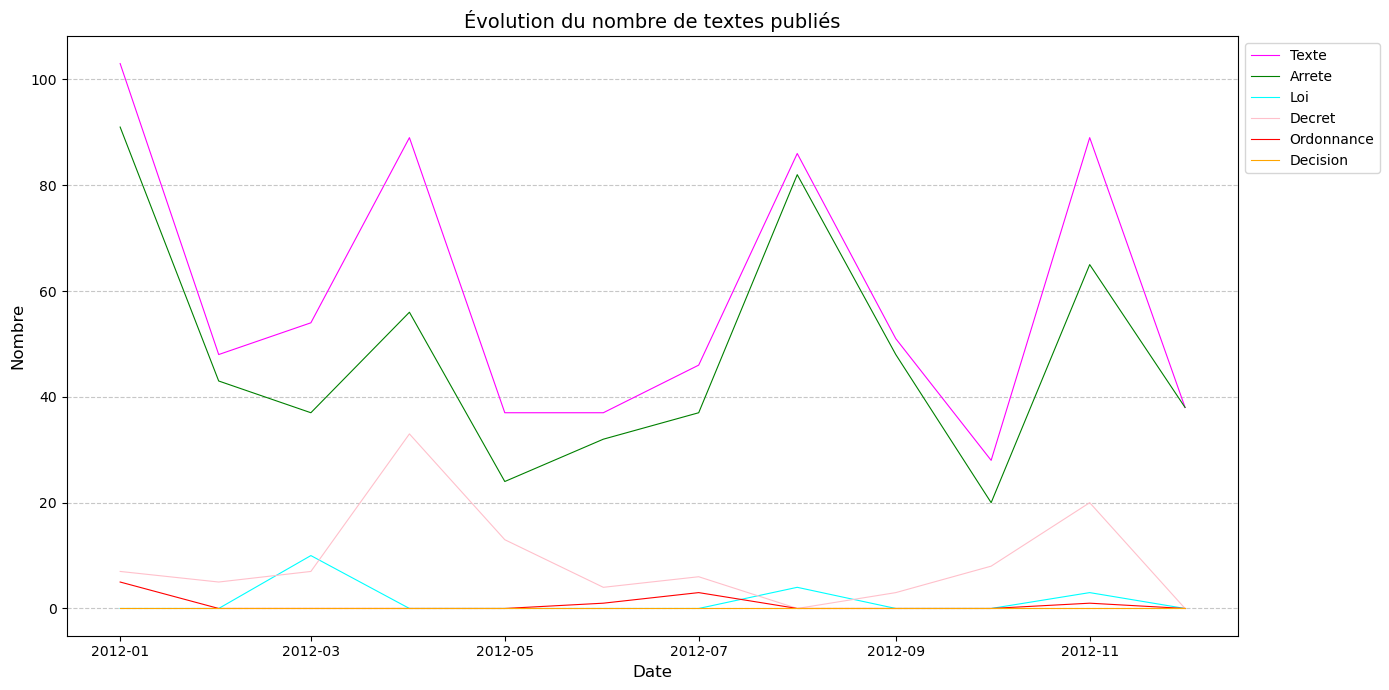

In [150]:
tracer_evolution_taux(tri_occurence(df_loda), charte_graphique_3,  taux = "Nombre", title="Évolution du nombre de textes publiés", xlabel = "Date",ylabel = "Nombre", time_period = ["2012-01-01", "2012-12-31"])

In [151]:
#tracer_evolution_taux(df_sorted, charte_graphique_3,  taux = "Cumulatif", title="Évolution du nombre de textes publiés", xlabel = "Date",ylabel = "Nombre", time_period = ["2006-12-31", "2022-08-31"])

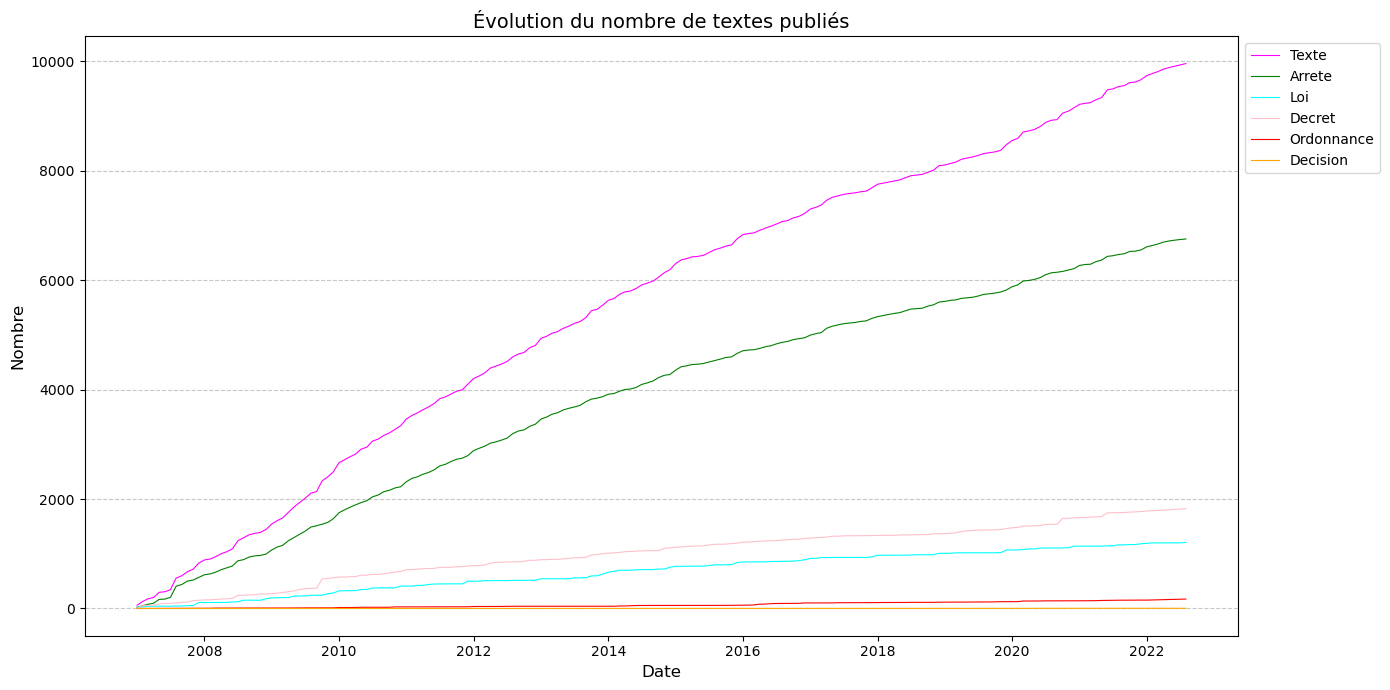

In [152]:
tracer_evolution_taux(tri_occurence(df_loda), charte_graphique_3,  taux = "Cumulatif", title="Évolution du nombre de textes publiés", xlabel = "Date",ylabel = "Nombre", time_period = ["2006-12-31", "2022-08-31"])

In [170]:
def plot_histogram(df, types):
    """
    Trace un histogramme du nombre de textes par mois pour un type spécifique de texte,
    et une courbe cumulée du nombre de textes.

    Parameters:
    df (DataFrame): Le DataFrame contenant les données.
    type (str): Le type spécifique de texte à analyser (ex: 'LOI', 'DECRET').
    """
    # Filtrer les données par le type de texte
    df_filtered = df[df['Indicateur'].isin(types)]
    print(df['Indicateur'].unique())
    # S'assurer que la colonne 'Date' est de type datetime
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')

    # Créer le graphique
    fig, ax = plt.subplots(figsize=(12, 6))

    # Histogramme du nombre de textes par mois avec des barres plus larges
    ax.bar(df_filtered['Date'], df_filtered['Nombre'], width=20, label='Nombre de textes par mois', color='lightblue')

    # Ajouter des titres et des labels
    ax.set_title(f"Nombre de textes : {', '.join(types) if isinstance(types, list) else types}", fontsize=14)
    ax.set_xlabel('Mois', fontsize=12)
    ax.set_ylabel('Nombre de textes', fontsize=12)

    # Ajouter une légende
    ax.legend()

    # Améliorer l'aspect du graphique
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


['Texte' 'Arrete' 'Loi' 'Decision' 'Ordonnance' 'Decret']


/tmp/ipykernel_11943/853816581.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')


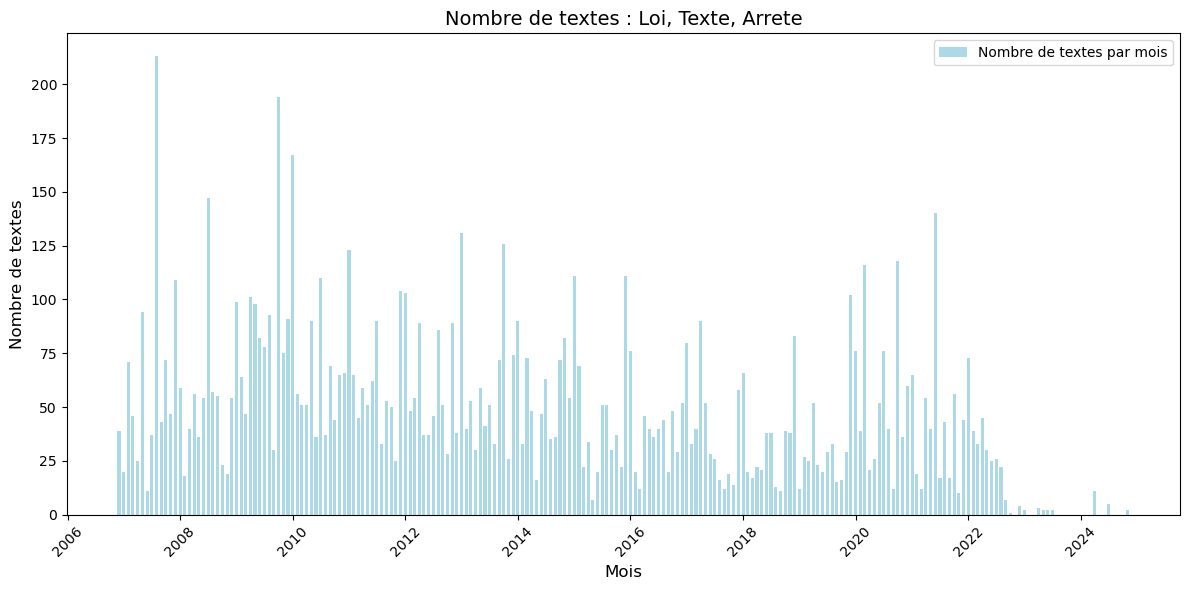

In [172]:
plot_histogram(tri_occurence(df_loda), ['Loi', 'Texte','Arrete'])

/tmp/ipykernel_11943/214674407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')


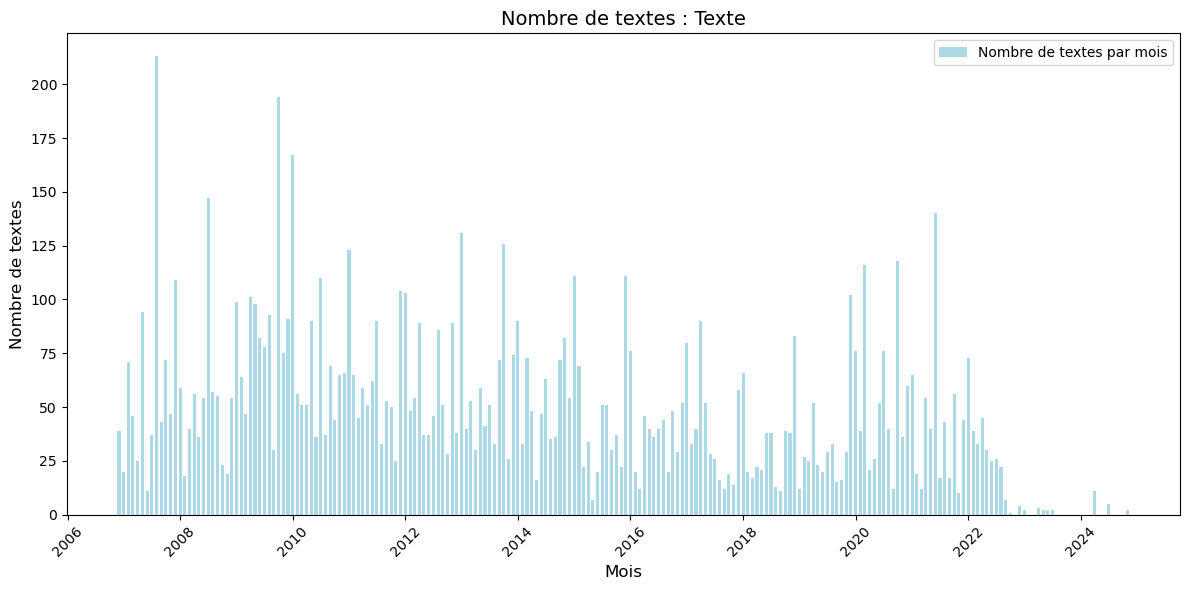

In [155]:
plot_histogram(tri_occurence(df_loda), 'Texte')

/tmp/ipykernel_11943/214674407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')


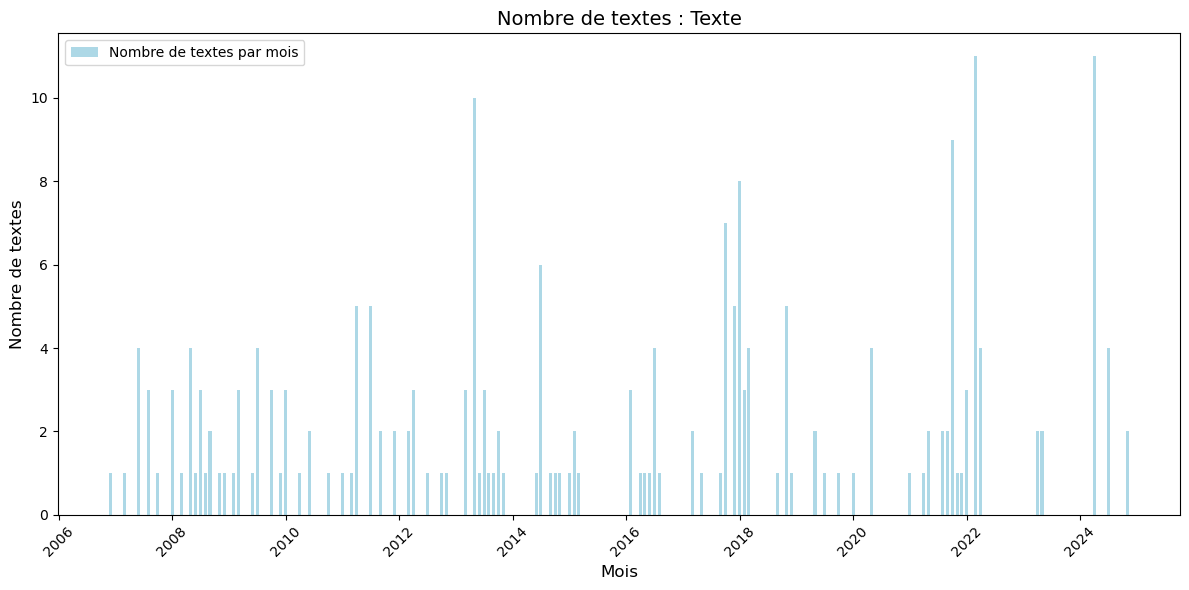

In [156]:
plot_histogram(tri_occurence(filter_rows_with_keyword(df_loda, 'vol')), 'Texte')